In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import geopandas as gpd
from sklearn.preprocessing import scale

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#


In [3]:
df = pd.read_csv('2015_tree_process.csv')
df = df.groupby("tree_dbh").filter(lambda x: (len(x) > 500))
df = df.rename(columns ={'comlaint_count':'complaint_counts'})
df.head()

,tree_id,borough,zipcode,latitude,longitude,tree_dbh,spc_common,health,Median_Individual_Income,Median_Resident_Age,...,post_office,neighborhood,population,density,family,health_class,borough_class,tree_class,tree_family_class,complaint_counts
0,180683,Queens,11375,40.723092,-73.844215,3,red maple,Fair,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,2,1,1.0,0,783.0
2,193183,Queens,11375,40.717032,-73.838297,3,Amur maple,Good,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,1,1,3.0,0,783.0
3,203577,Queens,11375,40.712480,-73.855020,26,London planetree,Good,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1,783.0
4,203386,Queens,11375,40.712641,-73.852138,26,London planetree,Good,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1,783.0
5,203592,Queens,11375,40.713384,-73.854460,38,London planetree,Good,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1,783.0


In [70]:
# df['health'].value_counts()

In [79]:
# final_df = df
# health_class = {"Good":1,"Fair":2,"Poor":3,"Dead":4}
# final_df ['health_class'] = final_df['health'].apply(lambda x: health_class.get(x))
# borough_class = {"Queens":1,"Brooklyn":2,"Staten Island":3,"Bronx":4,"Manhattan":5}
# final_df ['borough_class'] = final_df['borough'].apply(lambda x: borough_class.get(x))


## 1 = Large Trees: Mature Height Greater Than 50 Feet
## 2 = Medium Trees: Mature Height 35–50 Feet
## 3 = Intermediate Trees: Mature Height 25–35 Feet
## 4 = Small Trees: Mature Height Less Than 25 Feet

In [68]:

# tree_class={'Schubert':4,'chokecherry':3,'American beech':1,'American elm':1,'American hophornbeam':3,
#  'American hornbeam':3,'American larch':2,'American linden':1,'Amur cork tree':3,'Amur maackia':4,
#  'Amur maple':3,'Atlantic white cedar':1,'Atlas cedar':1,'Callery pear':3,'Chinese chestnut':1,'Chinese elm':1,
#     'Chinese fringetree':4,'Chinese tree lilac':4,'Cornelian cherry':4,'Douglas-fir':1,'English oak':1,
#  'European alder':1,'European beech':1,'European hornbeam':3,'Himalayan cedar':1,'Japanese hornbeam':4,
#  'Japanese maple':4,'Japanese snowbell':3,'Japanese tree lilac':4,'Japanese zelkova':1,
#  'Kentucky coffeetree':1,'Kentucky yellowwood':2,'London planetree':1,'Norway maple':1,'Norway spruce':1,
#  'Ohio buckeye':1,'Oklahoma redbud':3,'Osage-orange':3,'Persian ironwood':3,"Schumard's oak":1,'Scots pine':1,
#  'Shantung maple':3,'Siberian elm':1,'Sophora':1,'Turkish hazelnut':2,'Virginia pine':1,'arborvitae':1,'ash':1,
#  'bald cypress':1,'bigtooth aspen':1,'black cherry':1,'black locust':1,'black maple':1,'black oak':1,
#  'black pine':2,'black walnut':1,'blackgum':2,'blue spruce':1,'boxelder':2,
#  'bur oak':1,'catalpa':2,'cherry':3,'cockspur hawthorn':4,'common hackberry':2,'crab apple':4,
#  'crepe myrtle':4,'crimson king maple':2,'cucumber magnolia':1,'dawn redwood':1,
#  'eastern cottonwood':1,'eastern hemlock':1,'eastern redbud':4,'eastern redcedar':2,'empress tree':2,
#  'false cypress':1,'flowering dogwood':4,'ginkgo':3,'golden raintree':3,'green ash':1,
#  'hardy rubber tree':1,'hawthorn':4,'hedge maple':3,'holly':2,'honeylocust':1,
#  'horse chestnut':1,'katsura tree':2,'kousa dogwood':4,'littleleaf linden':1,'magnolia':1,'maple':1,
#  'mimosa':4,'mulberry':1,'northern red oak':1,'pagoda dogwood':4,'paper birch':4,'paperbark maple':4,
#  'pignut hickory':1,'pin oak':1,'pine':1,'pitch pine':1,'pond cypress':1,'purple-leaf plum':4,
#  'quaking aspen':1,'red horse chestnut':2,'red maple':1,'red pine':1,'river birch':1,'sassafras':2,
#  'sawtooth oak':1,'scarlet oak':1,'serviceberry':4,'shingle oak':1,'silver birch':1,'silver linden':1,
#  'silver maple':1,'smoketree':4,'southern magnolia':1,'southern red oak':1,'spruce':1,'sugar maple':1,
#  'swamp white oak':1,'sweetgum':1,'sycamore maple':1,'tartar maple':4,'tree of heaven':1,'trident maple':3,
#  'tulip-poplar':1,'two-winged silverbell':3,'weeping willow':3,
#  'white ash':1,'white oak':1,'white pine':1,'willow oak':1}

# final_df ['tree_class'] = final_df['spc_common'].apply(lambda x: tree_class.get(x))

In [30]:
# final_df

# spc_common_df = pd.DataFrame(final_df["spc_common"].unique()).reset_index()
# spc_common_df.columns=["spc_common","tree_name_class"]
# spc_common_df = dict(zip(spc_common_df['tree_name_class'],spc_common_df['spc_common']))
# final_df ['tree_name_class'] = final_df['spc_common'].apply(lambda x: spc_common_df.get(x))

family_df = pd.DataFrame(final_df["family"].unique()).reset_index()
family_df.columns=["family","tree_family_class"]
family_df = dict(zip(family_df['tree_family_class'],family_df['family']))
final_df ['tree_family_class'] = final_df['family'].apply(lambda x: family_df.get(x))






In [31]:
final_df = final_df.dropna()
final_df.head()

,tree_id,borough,zipcode,latitude,longitude,tree_dbh,spc_common,health,Median_Individual_Income,Median_Resident_Age,Median_Monthly_House_Cost,post_office,neighborhood,population,density,family,health_class,borough_class,tree_class,tree_family_class
0,180683,Queens,11375,40.723092,-73.844215,3,red maple,Fair,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,2,1,1.0,0
2,193183,Queens,11375,40.717032,-73.838297,3,Amur maple,Good,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,1,1,3.0,0
3,203577,Queens,11375,40.712480,-73.855020,26,London planetree,Good,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1
4,203386,Queens,11375,40.712641,-73.852138,26,London planetree,Good,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1
5,203592,Queens,11375,40.713384,-73.854460,38,London planetree,Good,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1


# split dataset into training and test sets

In [151]:
from sklearn.model_selection import train_test_split
from scipy import stats
final_df = df[['health_class','tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
      'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
    'tree_class', 'tree_family_class','complaint_counts']]
final_df =  final_df.dropna()
y=final_df.iloc[:,0]                   
X=final_df.iloc[:,1:] 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [154]:
# X=preprocessing.scale(X)
# X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
final_df.T.head(20)

,0,2,3,4,5,6,7,8,9,10,...,639841,639842,639843,639844,639845,639846,639847,639848,639849,639850
health_class,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
tree_dbh,3.0,3.0,26.0,26.0,38.0,23.0,6.0,32.0,3.0,8.0,...,9.0,3.0,10.0,11.0,10.0,7.0,6.0,11.0,11.0,6.0
Median_Individual_Income,84617.0,84617.0,84617.0,84617.0,84617.0,84617.0,84617.0,84617.0,84617.0,84617.0,...,160625.0,160625.0,160625.0,160625.0,160625.0,160625.0,160625.0,160625.0,160625.0,160625.0
Median_Resident_Age,43.5,43.5,43.5,43.5,43.5,43.5,43.5,43.5,43.5,43.5,...,33.8,33.8,33.8,33.8,33.8,33.8,33.8,33.8,33.8,33.8
Median_Monthly_House_Cost,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,...,3225.0,3225.0,3225.0,3225.0,3225.0,3225.0,3225.0,3225.0,3225.0,3225.0
population,68733.0,68733.0,68733.0,68733.0,68733.0,68733.0,68733.0,68733.0,68733.0,68733.0,...,3523.0,3523.0,3523.0,3523.0,3523.0,3523.0,3523.0,3523.0,3523.0,3523.0
density,34707.0,34707.0,34707.0,34707.0,34707.0,34707.0,34707.0,34707.0,34707.0,34707.0,...,87802.0,87802.0,87802.0,87802.0,87802.0,87802.0,87802.0,87802.0,87802.0,87802.0
borough_class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
tree_class,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0
tree_family_class,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,...,3.0,3.0,3.0,3.0,3.0,3.0,7.0,3.0,7.0,3.0


# Random Forest Regressor

In [133]:
rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.014969194365196281

In [105]:
#随机森林效果很差

In [12]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

0.5056691845772774


In [13]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
#Feature selection 

Text(0.5, 0, 'Relative Importance')

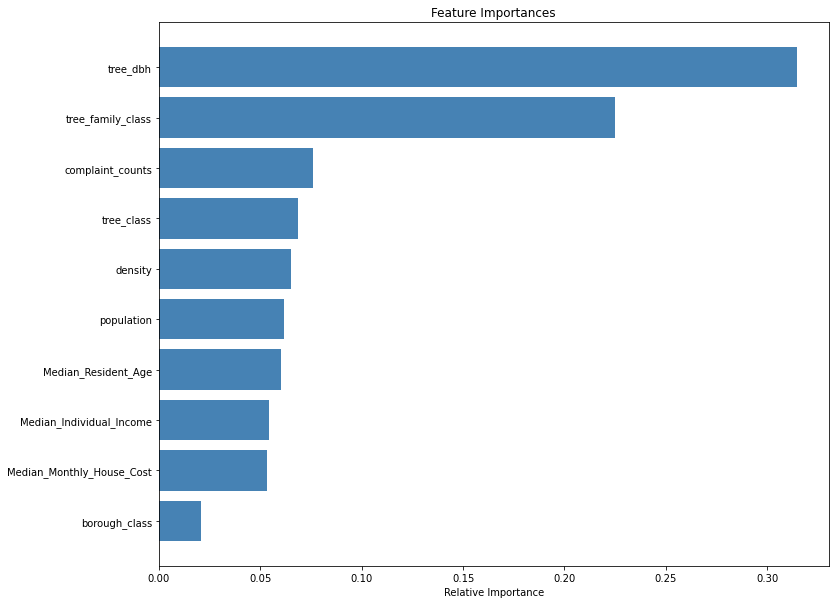

In [134]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[:10]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.xlabel('Relative Importance')

In [40]:
#top 3 feature are tree_dbh, tree_family_class, and population
rf_df = final_df[['health_class','tree_dbh','tree_family_class','population']]

In [41]:
# rf_df = pd.get_dummies(rf_df, columns=['tree_class'], prefix='name', drop_first = True)
rf_df = pd.get_dummies(rf_df, columns=['tree_family_class'], prefix='name', drop_first = True)
rf_df = rf_df.dropna()

In [57]:

rf_df['population'] = scale(rf_df['population'])

In [58]:

y=rf_df.iloc[:,0]                   
X=rf_df.iloc[:,1:] 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)


In [59]:

rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.014691528181209335

In [60]:
y_pred = rfr.predict(X_test)
RMSE=(np.mean(((y_pred - y_test))**2))**0.5
print(RMSE)

0.5070315880253604


In [61]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#  SVM

In [ ]:
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=2999)

C = [np.exp(i) for i in np.linspace(-8,8,50)] 
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
    OS_validation.append(correct)
    
temp=pd.DataFrame([C,OS_validation]).T # put results together.
print(temp)

C=[np.log(y) for y in C] # for a better graph
plt.gca()
plt.plot(C,OS_validation,'b',)
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show()

In [ ]:
clf = svm.SVC(kernel='linear',C=?)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print("Out of sample, we successfully predict {} percent of the data using a linear kernel".format((correct)*100))

# Decision Tree Classifier

In [141]:
final_df_4 = final_df.loc[:,:]
health_class = {"Good":1,"Fair":0,"Poor":0,"Dead":0}
final_df_4 ['health_class'] = final_df_4['health'].apply(lambda x: health_class.get(x))


<ipython-input-141-94ac934615d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_4 ['health_class'] = final_df_4['health'].apply(lambda x: health_class.get(x))


In [142]:

y=final_df_4.iloc[:,16]                   
X=final_df_4.iloc[:,[5,13,19]] 

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [143]:
OS=[]
for i in range(1,30):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.8267165723655032
Out of sample accuracy: 0.7959473796992678


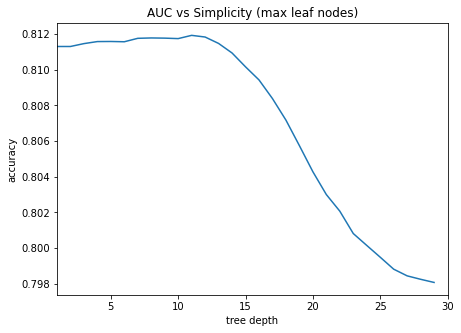

In [86]:
plt.figure(figsize=(7,5))
plt.plot(range(1,30),OS)
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.xlim(1,30)
plt.show()

In [87]:


param_grid ={'max_depth':range(1,30)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    print(rs.best_params_)
    OS.append(rs.score(X_test,y_test))
print("the out of sample accuracy after tuning the hyper-parameter is ",np.mean(OS))

{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 8}
{'max_depth': 9}
{'max_depth': 8}
{'max_depth': 7}
{'max_depth': 9}
{'max_depth': 6}
{'max_depth': 9}
{'max_depth': 9}
the out of sample accuracy after tuning the hyper-parameter is  0.8116167246660693


In [112]:
final_df_2 = df
final_df_2 ['tree_class'] = final_df_2['spc_common'].apply(lambda x: tree_class.get(x))
final_df_2 = final_df_2.dropna()
final_df_2.head(2)

,tree_id,borough,zipcode,latitude,longitude,tree_dbh,spc_common,health,Median_Individual_Income,Median_Resident_Age,Median_Monthly_House_Cost,post_office,neighborhood,population,density,family,health_class,borough_class,tree_class,tree_family_class
0,180683,Queens,11375,40.723092,-73.844215,3,red maple,Fair,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,2,1,1.0,0
1,203550,Queens,11375,40.713170,-73.854446,42,London planetree,Good,84617.0,43.5,1570.0,"Forest Hills, NY",West Central Queens,68733,34707,Platanaceae,1,1,1.0,1


In [156]:
# final_df_2.dtypes

In [144]:
from sklearn import tree
from IPython.display import Image
import pydotplus

y=final_df.iloc[:,7]                   
X=final_df.iloc[:,[5,18,19]] 
# X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

dt = DecisionTreeClassifier(max_depth = 3) # just to keep it simple for visualization
dt.fit(X,y)


thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)
# graph = pydotplus.graph_from_dot_data(thestring)  
# Image(graph.create_png())  

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="tree_family_class <= 0.5, samples = 637775, value = [1, 94691, 516848, 26235], class = Good", fillcolor="#65b3eb"] ;
1 [label="population <= 2.5, samples = 87377, value = [0, 19151, 61272, 6954], class = Good", fillcolor="#85c2ef"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="tree_dbh <= 3.5, samples = 81174, value = [0, 18202, 56300, 6672], class = Good", fillcolor="#87c4ef"] ;
1 -> 2 ;
3 [label="samples = 3793, value = [0, 569, 2987, 237], class = Good", fillcolor="#6bb6ec"] ;
2 -> 3 ;
4 [label="samples = 77381, value = [0, 17633, 53313, 6435], class = Good", fillcolor="#89c4ef"] ;
2 -> 4 ;
5 [label="population <= 3.5, samples = 6203, value = [0, 949, 4972, 282], class = Good", fillcolor="#67b4eb"] ;
1 -> 5 ;
6 [label="samples = 4716, value = [0, 699, 3820, 197], class = Good", fillcolor="#65b3eb"] ;
5 -> 6 ;
7 [label="sa

# http://www.webgraphviz.com/

In [ ]:
#没分出来 都是good 或许good占比太大了？？
#然后我把fair poor dead 归为一类

In [145]:
final_df_2 = final_df.loc[:,:]
health_class = {"Good":"Good","Fair":"Not Good","Poor":"Not Good","Dead":"Not Good"}
final_df_2 ['new_health_class'] = final_df_2['health'].apply(lambda x: health_class.get(x))

<ipython-input-145-e09ba2908a12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_2 ['new_health_class'] = final_df_2['health'].apply(lambda x: health_class.get(x))


In [146]:
# final_df_2

In [148]:
from sklearn import tree

y=final_df_2.iloc[:,20]                   
X=final_df_2.iloc[:,[5,17,19]] 
# X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

dt = DecisionTreeClassifier(max_depth=3) # just to keep it simple for visualization
dt.fit(X,y)


thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="tree_family_class <= 0.5, samples = 637775, value = [516848, 120927], class = Good", fillcolor="#eb9e67"] ;
1 [label="population <= 2.5, samples = 87377, value = [61272, 26105], class = Good", fillcolor="#f0b78d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="tree_dbh <= 3.5, samples = 54824, value = [36517, 18307], class = Good", fillcolor="#f2c09c"] ;
1 -> 2 ;
3 [label="samples = 2668, value = [2125, 543], class = Good", fillcolor="#eca16c"] ;
2 -> 3 ;
4 [label="samples = 52156, value = [34392, 17764], class = Good", fillcolor="#f2c29f"] ;
2 -> 4 ;
5 [label="population <= 4.5, samples = 32553, value = [24755, 7798], class = Good", fillcolor="#eda977"] ;
1 -> 5 ;
6 [label="samples = 31640, value = [24224, 7416], class = Good", fillcolor="#eda876"] ;
5 -> 6 ;
7 [label="samples = 913, value = [531, 382], class = Good", fillco

# In sample  and out-of-sample prediction accuracy for GNB

In [ ]:
#"Fair","Poor","Dead" ->0
#"Good" ->1

In [149]:
final_df_3 = final_df.loc[:,:]
health_class = {"Good":1,"Fair":0,"Poor":0,"Dead":0}
final_df_3 ['health_class'] = final_df_3['health'].apply(lambda x: health_class.get(x))

<ipython-input-149-fa1719761937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_3 ['health_class'] = final_df_3['health'].apply(lambda x: health_class.get(x))


In [150]:
final_df_3.head(2)

,tree_id,borough,zipcode,latitude,longitude,tree_dbh,spc_common,health,Median_Individual_Income,Median_Resident_Age,...,post_office,neighborhood,population,density,family,health_class,borough_class,tree_class,tree_family_class,new_health_class
0,180683,Queens,11375,40.723092,-73.844215,3,red maple,Fair,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,0,1,1.0,0,Not Good
2,193183,Queens,11375,40.717032,-73.838297,3,Amur maple,Good,84617.0,43.5,...,"Forest Hills, NY",West Central Queens,68733,34707,Aceraceae,1,1,3.0,0,Good


In [151]:
#选了 top 3 feature are tree_dbh, tree_family_class, and population 先来训练
y=final_df_3.iloc[:,16]                   
X=final_df_3.iloc[:,[5,13,19]] 


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [152]:
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.8065728582884227
Out of sample prediction accuracy: 0.8060606377363027


In [153]:
final_df_3.columns[[5,8,9,10,13,14,17,18,19]]

Index(['tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
       'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
       'tree_class', 'tree_family_class'],
      dtype='object')

In [154]:
#选了多一点feature:
#'tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
#       'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
#     'tree_class', 'tree_family_class'

y=final_df_3.iloc[:,16]                   
X=final_df.iloc[:,[5,8,9,10,13,14,17,18,19]] 


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [1]:
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

# Final GNB

In [4]:
df.columns

Index(['tree_id', 'borough', 'zipcode', 'latitude', 'longitude', 'tree_dbh',
       'spc_common', 'health', 'Median_Individual_Income',
       'Median_Resident_Age', 'Median_Monthly_House_Cost', 'post_office',
       'neighborhood', 'population', 'density', 'family', 'health_class',
       'borough_class', 'tree_class', 'tree_family_class', 'complaint_counts'],
      dtype='object')

In [5]:
final_df = df[['health_class','tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
      'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
    'tree_class', 'tree_family_class','complaint_counts']]

,health_class,tree_dbh,Median_Individual_Income,Median_Resident_Age,Median_Monthly_House_Cost,population,density,borough_class,tree_class,tree_family_class,complaint_counts
health_class,1.000000,-0.075955,0.008831,-0.017635,0.003999,-0.000589,0.034552,0.024354,0.006412,-0.007487,-0.017838
tree_dbh,-0.075955,1.000000,0.024060,0.124672,0.003793,-0.005217,-0.103630,-0.173490,-0.333512,-0.324609,0.141746
Median_Individual_Income,0.008831,0.024060,1.000000,0.416030,0.857059,-0.361338,-0.178344,0.019537,0.047729,0.000439,0.182354
Median_Resident_Age,-0.017635,0.124672,0.416030,1.000000,0.193367,-0.340661,-0.414090,-0.211915,0.045463,-0.039875,0.305352
Median_Monthly_House_Cost,0.003999,0.003793,0.857059,0.193367,1.000000,-0.312337,-0.143048,-0.011390,0.054668,0.015111,0.103331
population,-0.000589,-0.005217,-0.361338,-0.340661,-0.312337,1.000000,0.328155,0.080804,-0.061488,-0.013776,0.390898
density,0.034552,-0.103630,-0.178344,-0.414090,-0.143048,0.328155,1.000000,0.463486,-0.073899,0.029360,-0.386579
borough_class,0.024354,-0.173490,0.019537,-0.211915,-0.011390,0.080804,0.463486,1.000000,0.035208,0.049695,-0.272177
tree_class,0.006412,-0.333512,0.047729,0.045463,0.054668,-0.061488,-0.073899,0.035208,1.000000,0.424174,-0.010795
tree_family_class,-0.007487,-0.324609,0.000439,-0.039875,0.015111,-0.013776,0.029360,0.049695,0.424174,1.000000,-0.054490


In [150]:
final_df.columns = ['health','tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
      'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
    'tree_height', 'tree_family']
final_df.head(5)

,health,tree_dbh,Median_Individual_Income,Median_Resident_Age,Median_Monthly_House_Cost,population,density,borough_class,tree_height,tree_family
0,2,3,84617.0,43.5,1570.0,68733,34707,1,1.0,0
2,1,3,84617.0,43.5,1570.0,68733,34707,1,3.0,0
3,1,26,84617.0,43.5,1570.0,68733,34707,1,1.0,1
4,1,26,84617.0,43.5,1570.0,68733,34707,1,1.0,1
5,1,38,84617.0,43.5,1570.0,68733,34707,1,1.0,1


In [51]:
health_class = {1:1,2:0,3:0,4:0}
final_df ['health_class'] = final_df['health_class'].apply(lambda x: health_class.get(x))
final_df = final_df.dropna()

<ipython-input-51-98236183bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df ['health_class'] = final_df['health_class'].apply(lambda x: health_class.get(x))


In [52]:

final_df['population'] = scale(final_df['population'])
final_df['density'] = scale(final_df['density'])
final_df['Median_Individual_Income'] = scale(final_df['Median_Individual_Income'])
final_df['Median_Monthly_House_Cost'] = scale(final_df['Median_Monthly_House_Cost'])


In [53]:

y=final_df.iloc[:,0]                   
X=final_df.iloc[:,1:] 


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [54]:
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7985426998355889
Out of sample prediction accuracy: 0.7983149796428217


In [55]:
gnb.class_prior_

array([0.18938854, 0.81061146])

In [56]:
gnb.theta_

array([[ 1.05286987e+01,  1.65879479e-02,  3.86366583e+01,
         7.26692933e-03, -1.25166899e-03,  7.26236387e-02,
         2.38380386e+00,  1.56192121e+00,  4.42392166e+00],
       [ 1.19066045e+01, -3.75849717e-03,  3.88539627e+01,
        -1.43172865e-03, -5.71044366e-04, -1.74793020e-02,
         2.30904333e+00,  1.55843334e+00,  4.56299825e+00]])

#  Naive Bayes Discrete

In [57]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [61]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_train,y_train)
#for i,j in naive_bayes_classifier.items():
    #print (i)
    #print (j)
    #print
y_pred_train = testNaiveBayesDiscrete(X_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print ('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

<ipython-input-57-9a9a0f7d147d>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series(index=X.index)


In sample prediction accuracy: 0.7605870415417905
Out of sample prediction accuracy: 0.760490871935317


# Exploratory Data Analysis

In [6]:
# zipcode = gpd.read_file('ZIP_CODE_040114.shp')
# zipcode.head(2)

In [7]:
# visual_df = final_df

In [8]:
# gdf = gpd.GeoDataFrame(visual_df, geometry=gpd.points_from_xy(visual_df.longitude, visual_df.latitude))
# # CMPwithNYC = gpd.sjoin(gdf, zips.to_crs('EPSG:4326'), how='inner')['CMPLNT_NUM']
# # data = data[data['CMPLNT_NUM'].isin(CMPwithNYC)]
# data = gpd.sjoin(gdf, zipcode.to_crs('EPSG:4326'), how='inner')

In [10]:
# zip_count_df = data[['zipcode','family','tree_id']].groupby(['zipcode','family']).count().reset_index()
# zip_count_df.rename(columns = {'tree_id':'count'})

# Bayesian Network

In [92]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

In [70]:
final_df_2 = final_df[final_df['tree_family_class']==6]

In [71]:
# final_df_2 = final_df[['health_class','tree_family_class']]
# final_df_2 = final_df_2.merge(pd.get_dummies(final_df_2['tree_family_class']),left_index=True,right_index=True).drop(columns=['tree_family_class'])
# final_df_2

final_df_2 = final_df_2[['health_class','tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
      'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
    'tree_class', 'tree_family_class']]

In [72]:
X = final_df_2.iloc[:,1:]
y = final_df_2.iloc[:,0]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
# rfr = RandomForestRegressor(random_state=42, bootstrap=True) 
# rfr.fit(X_train, y_train)
# rfr.score(X_test, y_test)

In [3]:
# y_pred = rfr.predict(X_test)
# RMSE=(np.mean(((y_pred - y_test))**2))**0.5
# print(RMSE)

In [4]:
# family_df


In [82]:
final_df = df[['health_class','tree_dbh', 'Median_Individual_Income', 'Median_Resident_Age',
      'Median_Monthly_House_Cost', 'population', 'density', 'borough_class',
    'tree_class', 'tree_family_class']]


,health_class,tree_dbh,Median_Individual_Income,Median_Resident_Age,Median_Monthly_House_Cost,population,density,borough_class,tree_class,tree_family_class
0,2,3,84617.0,43.5,1570.0,68733,34707,1,1.0,0
2,1,3,84617.0,43.5,1570.0,68733,34707,1,3.0,0
3,1,26,84617.0,43.5,1570.0,68733,34707,1,1.0,1
4,1,26,84617.0,43.5,1570.0,68733,34707,1,1.0,1
5,1,38,84617.0,43.5,1570.0,68733,34707,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...
639846,1,7,160625.0,33.8,3225.0,3523,87802,1,1.0,3
639847,1,6,160625.0,33.8,3225.0,3523,87802,1,3.0,7
639848,1,11,160625.0,33.8,3225.0,3523,87802,1,1.0,3
639849,1,11,160625.0,33.8,3225.0,3523,87802,1,3.0,7


In [83]:
train,test=train_test_split(final_df,random_state=999,test_size=0.2)

In [90]:
hc = HillClimbSearch(train)
scoring_method=BicScore(train)
best_model = BayesianModel(hc.estimate().edges()) # convert DAG to BayesianModel
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('health_class', 'Median_Monthly_House_Cost'), ('health_class', 'tree_family_class'), ('Median_Monthly_House_Cost', 'density'), ('tree_family_class', 'tree_class'), ('tree_family_class', 'tree_dbh'), ('tree_family_class', 'Median_Monthly_House_Cost'), ('Median_Individual_Income', 'borough_class'), ('borough_class', 'tree_dbh'), ('density', 'population'), ('density', 'Median_Individual_Income'), ('density', 'Median_Resident_Age'), ('tree_class', 'tree_dbh'), ('tree_class', 'Median_Monthly_House_Cost')]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [144]:
from graphviz import Digraph

In [145]:
def showBN(model,save=False):
 
    node_attr = dict(
     style='filled',
     shape='box',
     align='left',
     fontsize='12',
     ranksep='0.1',
     height='0.2'
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges=model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        dot.view(cleanup=True)
    return dot

In [5]:
# showBN(best_model)

In [93]:
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

CPD of health_class:
+-----------------+-------------+
| health_class(1) | 0.810462    |
+-----------------+-------------+
| health_class(2) | 0.148274    |
+-----------------+-------------+
| health_class(3) | 0.0412603   |
+-----------------+-------------+
| health_class(4) | 3.91985e-06 |
+-----------------+-------------+
CPD of Median_Monthly_House_Cost:
+-----------------------------------+-----+-----------------------+
| health_class                      | ... | health_class(4)       |
+-----------------------------------+-----+-----------------------+
| tree_class                        | ... | tree_class(4.0)       |
+-----------------------------------+-----+-----------------------+
| tree_family_class                 | ... | tree_family_class(33) |
+-----------------------------------+-----+-----------------------+
| Median_Monthly_House_Cost(800.0)  | ... | 0.006172839506172839  |
+-----------------------------------+-----+-----------------------+
| Median_Monthly_House_Cost

+--------------------------+-----+
| Median_Individual_Income | ... |
+--------------------------+-----+
| borough_class(1)         | ... |
+--------------------------+-----+
| borough_class(2)         | ... |
+--------------------------+-----+
| borough_class(3)         | ... |
+--------------------------+-----+
| borough_class(4)         | ... |
+--------------------------+-----+
| borough_class(5)         | ... |
+--------------------------+-----+
CPD of density:
+---------------------------+-----+
| Median_Monthly_House_Cost | ... |
+---------------------------+-----+
| density(1295)             | ... |
+---------------------------+-----+
| density(1838)             | ... |
+---------------------------+-----+
| density(4840)             | ... |
+---------------------------+-----+
| density(5519)             | ... |
+---------------------------+-----+
| density(6235)             | ... |
+---------------------------+-----+
| density(7081)             | ... |
+------------------------

+---------------------------+-----+----------------------+
| density                   | ... | density(143683)      |
+---------------------------+-----+----------------------+
| Median_Resident_Age(28.0) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(29.2) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(29.6) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(29.8) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(30.3) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(30.8) | ... | 0.000671591672263264 |
+---------------------------+-----+----------------------+
| Median_Resident_Age(31.0) | ... | 0.000671591672263264 |
+---------------------------+-----+---------------------

In [99]:
# train

In [98]:
#Report the IS and OS classification accuracy for "health_class"
train_x = train.loc[:,"tree_dbh":"tree_family_class"]
predicted_train = best_model.predict(train_x)
print("In sample:",(train.loc[:,'health_class'].reset_index(drop=True)==predicted_train['health_class']).mean())

test_x = test.loc[:,"tree_dbh":"tree_family_uclass"]
predicted_test = best_model.predict(test_x)
print("Out of sample:",(test.loc[:,'health_class'].reset_index(drop=True)==predicted_test['health_class']).mean())

  0%|          | 0/58234 [00:00<?, ?it/s]

In sample: 0.8115616792756066


  0%|          | 0/35837 [00:00<?, ?it/s]

Out of sample: 0.8097604954725413


In [123]:
#top 3 feature are tree_dbh, tree_family_class, and population
final_df = df[['health_class','tree_dbh', 'tree_family_class','comlaint_count']]
final_df = final_df.dropna()

In [124]:
train,test=train_test_split(final_df,random_state=999,test_size=0.2)

In [125]:
hc = HillClimbSearch(train)
scoring_method=BicScore(train)
best_model = BayesianModel(hc.estimate().edges()) # convert DAG to BayesianModel
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('health_class', 'tree_family_class'), ('health_class', 'tree_dbh'), ('tree_family_class', 'tree_dbh'), ('tree_family_class', 'comlaint_count'), ('tree_dbh', 'comlaint_count')]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [126]:
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

CPD of health_class:
+-----------------+-----------+
| health_class(1) | 0.81056   |
+-----------------+-----------+
| health_class(2) | 0.148364  |
+-----------------+-----------+
| health_class(3) | 0.0410718 |
+-----------------+-----------+
| health_class(4) | 3.92e-06  |
+-----------------+-----------+
CPD of tree_family_class:
+-----------------------+-----+---------------------+
| health_class          | ... | health_class(4)     |
+-----------------------+-----+---------------------+
| tree_family_class(0)  | ... | 0.02857142857142857 |
+-----------------------+-----+---------------------+
| tree_family_class(1)  | ... | 0.02857142857142857 |
+-----------------------+-----+---------------------+
| tree_family_class(2)  | ... | 0.02857142857142857 |
+-----------------------+-----+---------------------+
| tree_family_class(3)  | ... | 0.05714285714285714 |
+-----------------------+-----+---------------------+
| tree_family_class(4)  | ... | 0.02857142857142857 |
+----------------

+------------------------+-----+-----------------------+
| tree_dbh               | ... | tree_dbh(41)          |
+------------------------+-----+-----------------------+
| tree_family_class      | ... | tree_family_class(33) |
+------------------------+-----+-----------------------+
| comlaint_count(1.0)    | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(2.0)    | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(3.0)    | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(5.0)    | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(10.0)   | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(17.0)   | ... | 0.006622516556291391  |
+------------------------+-----+-----------------------+
| comlaint_count(28.0)   | ... 

In [127]:
#Report the IS and OS classification accuracy for "health_class"
train_x = train.loc[:,"tree_dbh":"comlaint_count"]
predicted_train = best_model.predict(train_x)
print("In sample:",(train.loc[:,'health_class'].reset_index(drop=True)==predicted_train['health_class']).mean())

test_x = test.loc[:,"tree_dbh":"comlaint_count"]
predicted_test = best_model.predict(test_x)
print("Out of sample:",(test.loc[:,'health_class'].reset_index(drop=True)==predicted_test['health_class']).mean())

  0%|          | 0/44576 [00:00<?, ?it/s]

In sample: 0.8106487651901215


  0%|          | 0/28997 [00:00<?, ?it/s]

Out of sample: 0.8097466895594704
